# I. Neflix 데이터 및 칼럼 설명
- show_id : 컨텐츠 해당 아이디 번호
- type : tv쇼 또는 영화 중 컨텐츠가 속한 범주
- title : 컨텐츠 이름
- director : 컨텐츠 제작자 또는 감독
- cast : 영화와 tv쇼의 캐스팅 배우 목록
- country : 컨텐츠 제작 국가
- date_added : 컨텐츠 업데이트 된 날짜
- release_year : 컨텐츠 개봉 연도 또는 방영 시작 연도
- rating : 컨텐츠 관람 또는 시청 등급
- duration : 컨텐츠 상영 또는 방영 시간
- listed_in : 컨텐츠 해당 장르 목록
- description : 컨텐츠 상세 설명

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [74]:
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [75]:
# 데이터 출처 : https://www.kaggle.com/datasets/kumarinishu/netflix-titles
df = pd.read_csv('/content/drive/MyDrive/AI프로젝트/공조_넷플릭스데이터분석/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [77]:
# 결측치 값 확인
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

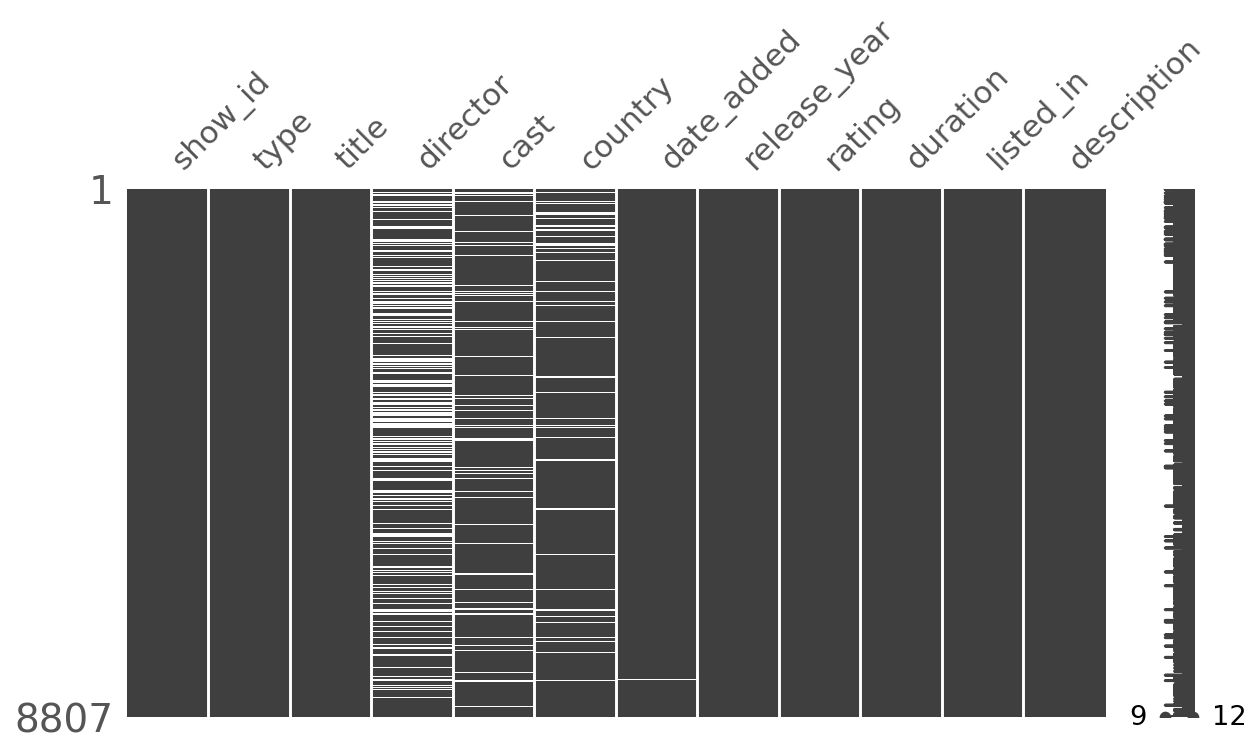

In [78]:
# 결측치 확인
msno.matrix(df, figsize=(10, 5));

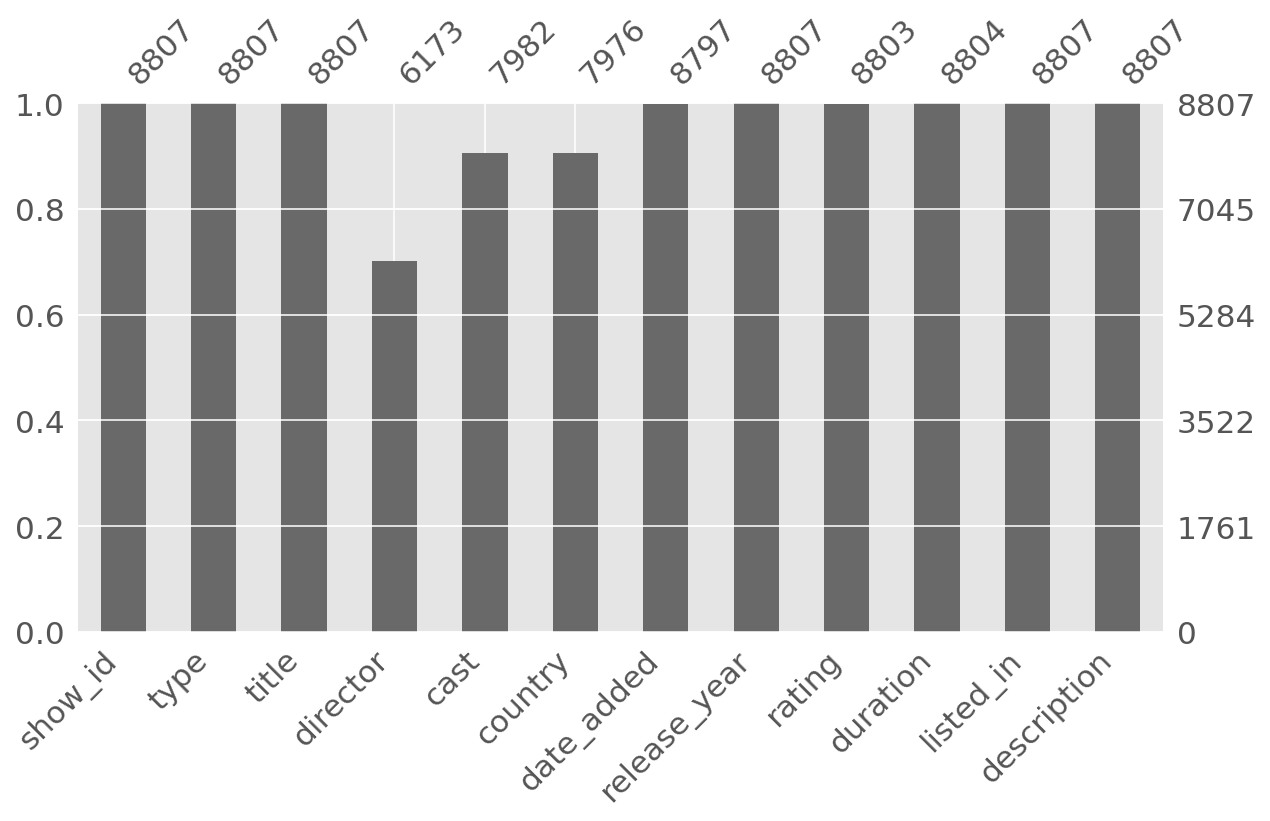

In [79]:
# director, cast, country 순으로 결측치 多
msno.bar(df, figsize=(10, 5));

In [80]:
# 결측치 : missing으로 replace
df['director'].replace(np.nan, 'missing', inplace=True)
df['cast'].replace(np.nan, 'missing', inplace=True)
df['country'].replace(np.nan, 'missing', inplace=True)

In [81]:
df.dropna(inplace=True)

In [82]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [83]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# II. 전처리

## country 칼럼을 활용해 파생변수 생성

In [84]:
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


In [85]:
df['country_1st'] = df['country'].apply(lambda x: x.split(',')[0])

## rating 칼럼을 활용해 파생변수 생성

In [86]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [87]:
ratings_ages = {'TV-MA':'adults',
                'TV-14':'teens',
                'PG-13':'teens',
                'PG':'older_kids',
                'R':'adults',
                'TV-PG':'older_kids',
                'G':'kids',
                'TV-Y7':'older_kids',
                'TV-G':'kids',
                'TV-Y':'kids',
                'NC-17':'adults',
                'NR':'adults',
                'TV-Y7-FV':'older_kids',
                'UR':'adults'}

In [88]:
df['target_user'] = df['rating'].replace(ratings_ages)
df['target_user'].value_counts()

adults        4089
teens         2647
older_kids    1487
kids           567
Name: target_user, dtype: int64

## duration 칼럼을 활용해 파생변수 생성

In [89]:
df['duration'].unique()[:10]

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min'],
      dtype=object)

In [90]:
df['season_count'] = df.apply(lambda x: x['duration'].split(' ')[0] if 'Season' in x['duration'] else '', axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,country_1st,target_user,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,United States,teens,
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,South Africa,adults,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,missing,adults,1
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021,missing,adults,1
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,India,adults,2


In [91]:
df['season_count'].replace('', np.nan, inplace=True)

In [92]:
df['duration'] = df.apply(lambda x: x['duration'].split(' ')[0] if 'Season' not in x['duration'] else '', axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,country_1st,target_user,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,United States,teens,NaN
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,South Africa,adults,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,missing,adults,1
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021,missing,adults,1
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,India,adults,2


In [93]:
df['duration'].replace('', np.nan, inplace=True)

In [94]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,country_1st,target_user,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,United States,teens,NaN
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,South Africa,adults,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,missing,adults,1
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021,missing,adults,1
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,NaN,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,India,adults,2


In [95]:
df['genre'] = df['listed_in'].apply(lambda x: x.replace(' ,', ',').replace(', ', ',').split(','))
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,United States,teens,NaN,[Documentaries]
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,South Africa,adults,2,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,missing,adults,1,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021,missing,adults,1,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,NaN,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,India,adults,2,"[International TV Shows, Romantic TV Shows, TV..."


In [96]:
df.drop(['show_id', 'description'], axis=1, inplace=True)

In [97]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90,Documentaries,9,September,2021,United States,teens,NaN,[Documentaries]
1,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries",9,September,2021,South Africa,adults,2,"[International TV Shows, TV Dramas, TV Mysteries]"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",9,September,2021,missing,adults,1,"[Crime TV Shows, International TV Shows, TV Ac..."
3,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,NaN,"Docuseries, Reality TV",9,September,2021,missing,adults,1,"[Docuseries, Reality TV]"
4,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,NaN,"International TV Shows, Romantic TV Shows, TV ...",9,September,2021,India,adults,2,"[International TV Shows, Romantic TV Shows, TV..."


In [98]:
df['duration']

0        90
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8802    158
8803    NaN
8804     88
8805     88
8806    111
Name: duration, Length: 8790, dtype: object

In [99]:
data = {'연도':list(range(2012,2022)),
        '관객수' : [19489,21335,21506,21729,21702,21987,21639,22668,5952,6053]}

In [100]:
df_audience = pd.DataFrame(data)
df_audience

,연도,관객수
0,2012,19489
1,2013,21335
2,2014,21506
3,2015,21729
4,2016,21702
5,2017,21987
6,2018,21639
7,2019,22668
8,2020,5952
9,2021,6053


In [101]:
import seaborn as sns

In [102]:
df_tv = df[df['type'] == 'TV Show']
df_movie = df[df['type'] == 'Movie']

In [103]:
df_tv.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
1,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries",9,September,2021,South Africa,adults,2,"[International TV Shows, TV Dramas, TV Mysteries]"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",9,September,2021,missing,adults,1,"[Crime TV Shows, International TV Shows, TV Ac..."
3,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,NaN,"Docuseries, Reality TV",9,September,2021,missing,adults,1,"[Docuseries, Reality TV]"
4,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,NaN,"International TV Shows, Romantic TV Shows, TV ...",9,September,2021,India,adults,2,"[International TV Shows, Romantic TV Shows, TV..."
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,NaN,"TV Dramas, TV Horror, TV Mysteries",9,September,2021,missing,adults,1,"[TV Dramas, TV Horror, TV Mysteries]"


In [104]:
df_movie.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90,Documentaries,9,September,2021,United States,teens,NaN,[Documentaries]
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,2021-09-24,2021,PG,91,Children & Family Movies,9,September,2021,missing,older_kids,NaN,[Children & Family Movies]
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",9,September,2021,United States,adults,NaN,"[Dramas, Independent Movies, International Mov..."
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",9,September,2021,United States,teens,NaN,"[Comedies, Dramas]"
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",9,September,2021,Germany,adults,NaN,"[Dramas, International Movies]"


# III. 5가지 기준으로 분석
- 콘텐츠 유형별 분석
- 국가별 분석
- 주요 소비자 타겟별 분석
- 주요 장르별 분석
- 계절별 분석



## 콘텐츠 유형별 분석

In [105]:
df1 = df.groupby(['release_year', 'type'])[['rating']].count()
df1.rename(columns={'rating':'count'}, inplace=True)

In [106]:
df1 = df1.reset_index()
df1.head()

,release_year,type,count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3


In [107]:
df1 = df1[df1['release_year'] > 2000]
df1.head()

,release_year,type,count
77,2001,Movie,40
78,2001,TV Show,5
79,2002,Movie,44
80,2002,TV Show,7
81,2003,Movie,51


In [108]:
df1['date'] = df1['release_year'].astype(str)
df1.head()

,release_year,type,count,date
77,2001,Movie,40,2001
78,2001,TV Show,5,2001
79,2002,Movie,44,2002
80,2002,TV Show,7,2002
81,2003,Movie,51,2003


In [109]:
df1['date'] = pd.to_datetime(df1['date'])

In [110]:
df1.head()

,release_year,type,count,date
77,2001,Movie,40,2001-01-01
78,2001,TV Show,5,2001-01-01
79,2002,Movie,44,2002-01-01
80,2002,TV Show,7,2002-01-01
81,2003,Movie,51,2003-01-01


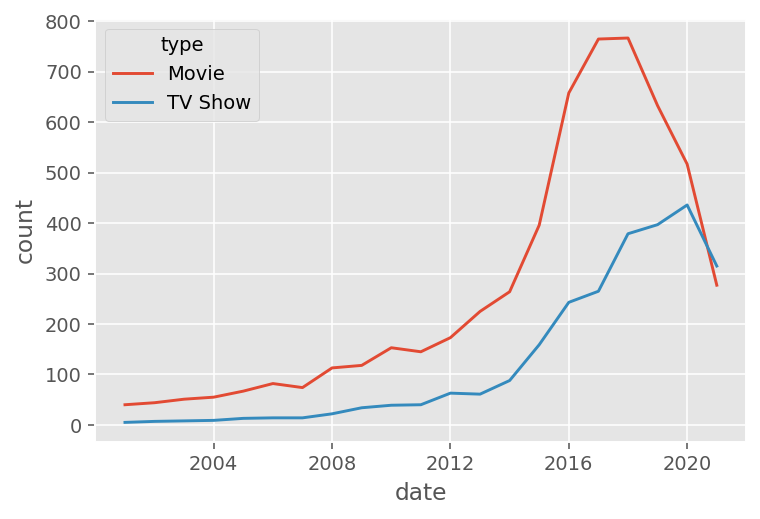

In [111]:
plt.style.use('ggplot')
sns.lineplot(x='date', y='count', data=df1, hue='type')

In [112]:
# 2015년 이후 영화 및 TV 프로그램 컨텐츠가 모두 증가
# 2016년 ~ 2017년 사이에 영화 컨텐츠 수가 급격히 증가
# 2018년 이후 코로나때매 급감
# 하지만 2020년이 다가오면서, 영화 개수는 떨어지고 TV쇼가 증가합니다. 
# 유력한 원인 중 하나는 바로 코로나19의 유행입니다.
# 코로나19의 유행으로 인해 영화산업이 축소된 것이죠. 
# 또 동시에 넷플릭스 오리지널 시리즈는 흥행하면서 TV 쇼는 확대된 것으로 분석해볼 수 있어요.

## 국가별 분석


In [113]:
df2 = df.groupby(['release_year', 'country_1st'])[['rating']].count()
df2.reset_index(inplace=True)
df2.rename(columns={'rating':'count', 'country_1st':'country'}, inplace=True)
df2.head()

,release_year,country,count
0,1925,missing,1
1,1942,United States,2
2,1943,United States,3
3,1944,United States,3
4,1945,United States,4


In [114]:
df2.drop(df2[df2['country']=='missing'].index, inplace=True)

In [115]:
df2[['country']].value_counts()[:10].index[0]

('United States',)

In [116]:
df2[['country']].value_counts()[:10].index[0][0]

'United States'

In [117]:
top10_list = list(df2[['country']].value_counts()[:10].index)
top10_lst = []

for i in range(len(top10_list)):
  top10_lst.append(top10_list[i][0])
  
top10_lst

['United States',
 'India',
 'United Kingdom',
 'Hong Kong',
 'Japan',
 'Egypt',
 'France',
 'Australia',
 'Germany',
 'Canada']

In [118]:
df2.sort_values(by=['country', 'release_year'])

,release_year,country,count
476,2014,,1
846,2021,,1
109,1985,Argentina,2
154,1993,Argentina,1
186,1998,Argentina,1
...,...,...,...
797,2019,Vietnam,2
844,2020,Vietnam,1
885,2021,Vietnam,1
65,1977,West Germany,1


In [119]:
df_us = df2[df2['country'] == 'United States']
df_us.head()

,release_year,country,count
1,1942,United States,2
2,1943,United States,3
3,1944,United States,3
4,1945,United States,4
5,1946,United States,2


In [120]:
df_us = df_us[df_us['release_year']>2000]

In [121]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 221 to 883
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   release_year  21 non-null     int64 
 1   country       21 non-null     object
 2   count         21 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 672.0+ bytes


In [122]:
df_us['date'] = df_us['release_year'].astype(str)
df_us.head()

,release_year,country,count,date
221,2001,United States,27,2001
234,2002,United States,22,2002
246,2003,United States,31,2003
263,2004,United States,22,2004
281,2005,United States,36,2005


In [123]:
df_us['date'] = pd.to_datetime(df_us['date'])

In [124]:
df2 = df2[df2['release_year']>2000]

In [125]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 213 to 885
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   release_year  653 non-null    int64 
 1   country       653 non-null    object
 2   count         653 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 20.4+ KB


In [126]:
df2['date'] = df2['release_year'].astype(str)
df2.head()

,release_year,country,count,date
213,2001,Australia,1,2001
214,2001,Germany,1,2001
215,2001,Hong Kong,1,2001
216,2001,India,8,2001
217,2001,Japan,2,2001


In [127]:
df2['date'] = pd.to_datetime(df2['date'])

In [128]:
df2[df2['country']=='United States']['count']

221     27
234     22
246     31
263     22
281     36
299     41
318     44
338     57
361     61
386     71
409     75
439     87
474    101
513    113
560    171
614    294
676    380
739    385
795    382
842    352
883    153
Name: count, dtype: int64

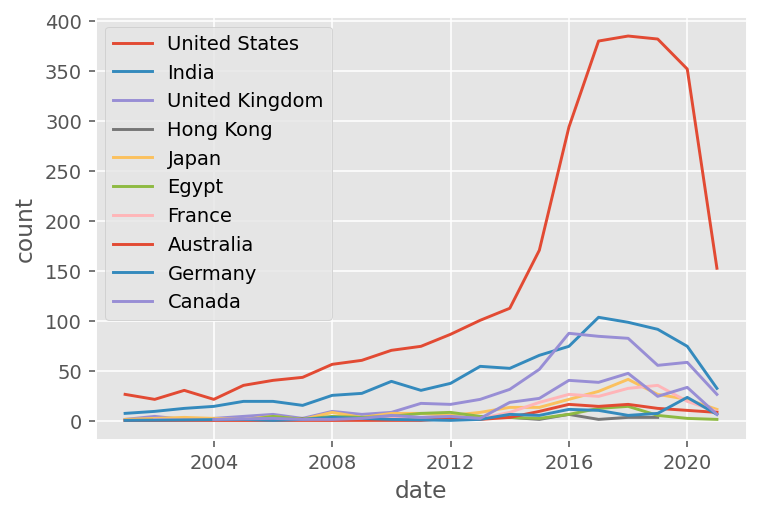

In [129]:
# plt.figure(figsize=(12,8))

for country in list(top10_lst):
    count_country = df2[df2['country'] == country].groupby('release_year').count()
    sns.lineplot(data=df2, x=df2['date'], y=df2[df2['country']==country]['count'], label=country)

plt.legend()
plt.ylabel('count')
plt.xlabel('date')
plt.show()

In [130]:
# 미국 콘텐츠에 더 집중하고 있는 것으로 보인다.
# 의외인 것은 인도 컨텐츠 비중이 꽤 높다. (사람이 많아서)
# 중국 아예 금지라 없음

## 소비자 연령별 분석


In [131]:
ratings_ages = {'TV-MA':'adults',
                'TV-14':'youth',
                'PG-13':'teens',
                'PG':'elem',
                'R':'adults',
                'TV-PG':'elem',
                'G':'kids',
                'TV-Y7':'elem',
                'TV-G':'kids',
                'TV-Y':'kids',
                'NC-17':'adults',
                'NR':'adults',
                'TV-Y7-FV':'elem',
                'UR':'adults'}

In [132]:
# kids : 전체관람가
# elem : 7세 이상
# teens : 13세 이상
# youth : 16세 이상
# adults : 18세 이상, 청불포함

In [133]:
df['target_user'] = df['rating'].replace(ratings_ages)
df['target_user'].value_counts()

adults    4089
youth     2157
elem      1487
kids       567
teens      490
Name: target_user, dtype: int64

In [134]:
rating_dict = {
    'kids' : ['G','TV-G','TV-Y'], # 전체관람가
    'elem' : ['PG','TV-Y7','TV-Y7-FV','TV-PG'], # 7세 이상
    'teen' : ['PG-13'], # 13세 이상
    'youth' : ['TV-14'], # 16세 이상
    'adult' : ['NC-17','R','TV-MA','NR','UR'] # 18세 이상, 청불 포함
}

rating_dict.keys()

dict_keys(['kids', 'elem', 'teen', 'youth', 'adult'])

In [135]:
df3 = df[['release_year', 'target_user', 'type']]
df3 = df3[df3['release_year'] > 2000]

In [136]:
df3['date'] = df3['release_year'].astype(str)
df3.head()

,release_year,target_user,type,date
0,2020,teens,Movie,2020
1,2021,adults,TV Show,2021
2,2021,adults,TV Show,2021
3,2021,adults,TV Show,2021
4,2021,adults,TV Show,2021


In [137]:
df3['date'] = pd.to_datetime(df3['date'])
df3.head()

,release_year,target_user,type,date
0,2020,teens,Movie,2020-01-01
1,2021,adults,TV Show,2021-01-01
2,2021,adults,TV Show,2021-01-01
3,2021,adults,TV Show,2021-01-01
4,2021,adults,TV Show,2021-01-01


In [138]:
df3 = df3.groupby(['target_user', 'date'])[['type']].count().reset_index()
df3.rename(columns={'type':'count'}, inplace=True)

In [139]:
df3.head()

,target_user,date,count
0,adults,2001-01-01,16
1,adults,2002-01-01,19
2,adults,2003-01-01,24
3,adults,2004-01-01,19
4,adults,2005-01-01,18


In [140]:
age_list = ['kids', 'elem', 'teens', 'youth', 'adults']

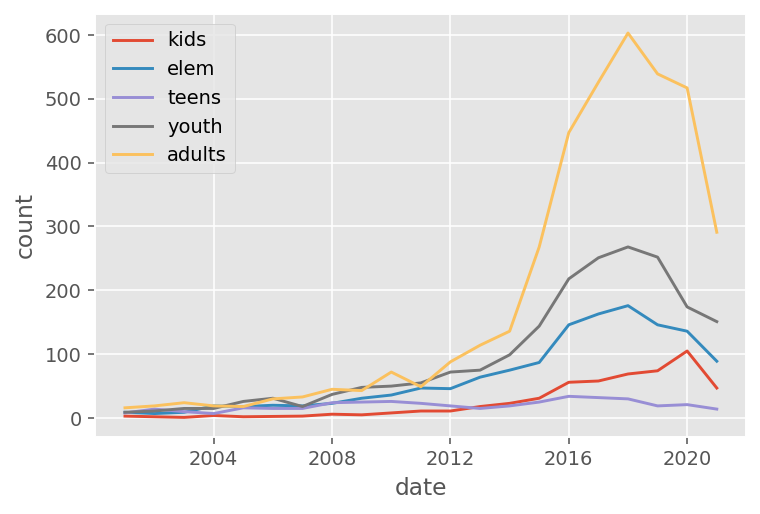

In [141]:
for i in list(age_list):
    # count_country = df3[df3['target_user'] == i].groupby('date').count()
    sns.lineplot(data=df3, x=df3['date'], y=df3[df3['target_user']==i]['count'], label=i)

plt.legend()
plt.ylabel('count')
plt.xlabel('date')
plt.show()
# kids : 전체관람가
# elem : 7세 이상
# teens : 13세 이상
# youth : 16세 이상
# adults : 18세 이상, 청불포함

In [142]:
# 가장 활발한 콘텐츠 이용자가 2~30대라는 점에서 전략적으로 해당 연령층에 집중

## 장르별 분석

In [143]:
df4 = df[['listed_in', 'release_year']]

In [144]:
df4 = df4[df4['release_year'] > 2000]

In [145]:
df4['date'] = df4['release_year'].astype(str)
df4.head()

,listed_in,release_year,date
0,Documentaries,2020,2020
1,"International TV Shows, TV Dramas, TV Mysteries",2021,2021
2,"Crime TV Shows, International TV Shows, TV Act...",2021,2021
3,"Docuseries, Reality TV",2021,2021
4,"International TV Shows, Romantic TV Shows, TV ...",2021,2021


In [146]:
df4['date'] = pd.to_datetime(df4['date'])
df4.head()

,listed_in,release_year,date
0,Documentaries,2020,2020-01-01
1,"International TV Shows, TV Dramas, TV Mysteries",2021,2021-01-01
2,"Crime TV Shows, International TV Shows, TV Act...",2021,2021-01-01
3,"Docuseries, Reality TV",2021,2021-01-01
4,"International TV Shows, Romantic TV Shows, TV ...",2021,2021-01-01


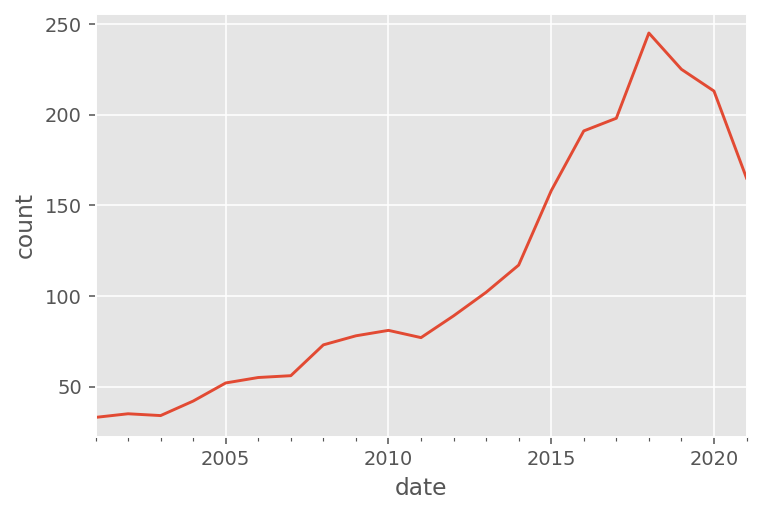

In [147]:
df4.groupby('date')['listed_in'].nunique().plot()

plt.xlabel('date')
plt.ylabel('count')
plt.show()

In [148]:
# 최근으로 올수록 더 다양한 장르를 보유하는 추세를 보인다.

In [149]:
# 최근 집중적으로 수급하는 장르 확인
top5 = df4['listed_in'].value_counts()[:5].index[:5]

In [150]:
df5 = df4.groupby(['listed_in', 'date'])[['release_year']].count()
df5

release_year
listed_in          date                    
Action & Adventure 2001-01-01             3
                   2002-01-01             2
                   2003-01-01             3
                   2004-01-01             1
                   2005-01-01             1
...                                     ...
Thrillers          2017-01-01             8
                   2018-01-01             8
                   2019-01-01            10
                   2020-01-01             5
                   2021-01-01             4

[2319 rows x 1 columns]

In [151]:
df5.reset_index(inplace=True)
df5.head()

,listed_in,date,release_year
0,Action & Adventure,2001-01-01,3
1,Action & Adventure,2002-01-01,2
2,Action & Adventure,2003-01-01,3
3,Action & Adventure,2004-01-01,1
4,Action & Adventure,2005-01-01,1


In [152]:
df5.rename(columns={'release_year':'count'}, inplace=True)
df5.head()

,listed_in,date,count
0,Action & Adventure,2001-01-01,3
1,Action & Adventure,2002-01-01,2
2,Action & Adventure,2003-01-01,3
3,Action & Adventure,2004-01-01,1
4,Action & Adventure,2005-01-01,1


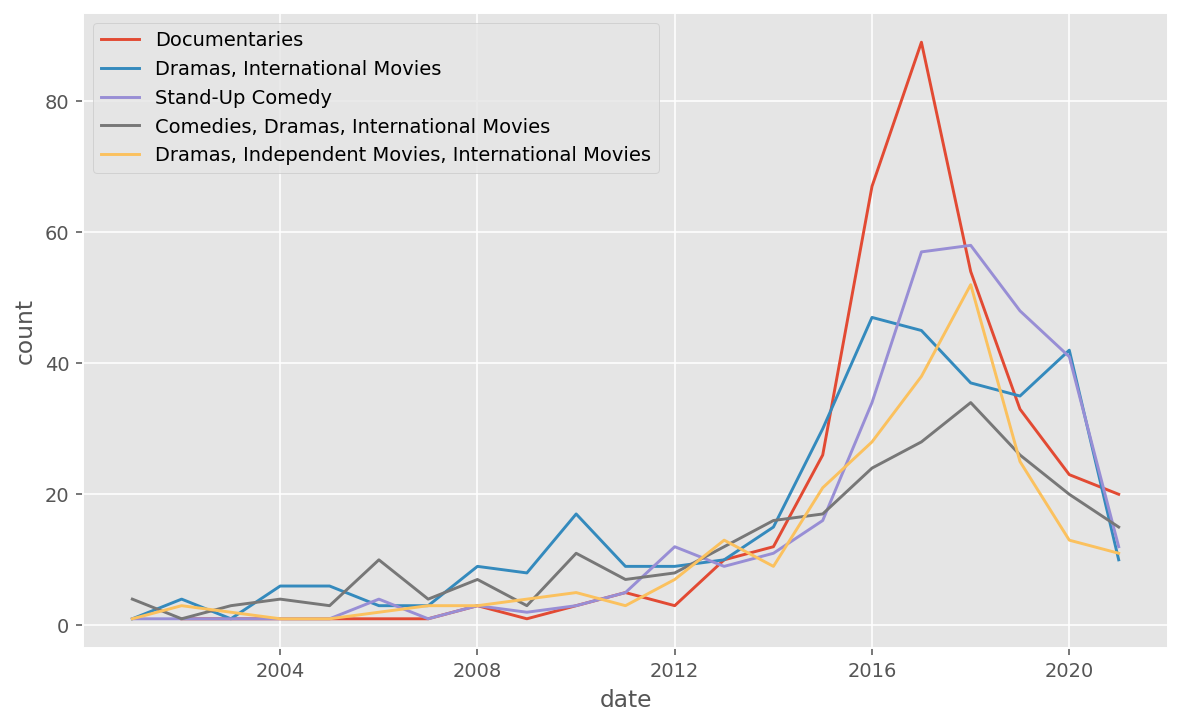

In [153]:
plt.figure(figsize=(10,6))

for i in list(top5):
    # count_country = df3[df3['target_user'] == i].groupby('date').count()
    sns.lineplot(data=df5, x=df5['date'], y=df5[df5['listed_in']==i]['count'], label=i)

plt.legend(loc='left')
plt.ylabel('count')
plt.xlabel('date')
plt.show()

In [154]:
# 2015년부터 다큐멘터리 boom이 존재
# 최근 넷플릭스는 다큐멘터리 수급에 집중하지 않고 있다.

## 계절별 분석

### 봄

In [155]:
df.head()
# 봄 345
# 여름 678
# 가을 9,10,11
# 겨울 12,1,2

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90,Documentaries,9,September,2021,United States,teens,NaN,[Documentaries]
1,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries",9,September,2021,South Africa,adults,2,"[International TV Shows, TV Dramas, TV Mysteries]"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",9,September,2021,missing,adults,1,"[Crime TV Shows, International TV Shows, TV Ac..."
3,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,NaN,"Docuseries, Reality TV",9,September,2021,missing,adults,1,"[Docuseries, Reality TV]"
4,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,NaN,"International TV Shows, Romantic TV Shows, TV ...",9,September,2021,India,adults,2,"[International TV Shows, Romantic TV Shows, TV..."


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              8790 non-null   object        
 1   title             8790 non-null   object        
 2   director          8790 non-null   object        
 3   cast              8790 non-null   object        
 4   country           8790 non-null   object        
 5   date_added        8790 non-null   datetime64[ns]
 6   release_year      8790 non-null   int64         
 7   rating            8790 non-null   object        
 8   duration          6126 non-null   object        
 9   listed_in         8790 non-null   object        
 10  month_added       8790 non-null   int64         
 11  month_name_added  8790 non-null   object        
 12  year_added        8790 non-null   int64         
 13  country_1st       8790 non-null   object        
 14  target_user       8790 n

In [157]:
df[df['month_added'] == 3]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
1145,Movie,At Eternity's Gate,Julian Schnabel,"Willem Dafoe, Rupert Friend, Oscar Isaac, Mads...","Ireland, Switzerland, United Kingdom, France, ...",2021-03-31,2018,PG-13,111,Dramas,3,March,2021,Ireland,teens,NaN,[Dramas]
1146,TV Show,Haunted: Latin America,Adrián García Bogliano,missing,"United States, Mexico",2021-03-31,2021,TV-14,NaN,"International TV Shows, Reality TV, Spanish-La...",3,March,2021,United States,youth,1,"[International TV Shows, Reality TV, Spanish-L..."
1147,Movie,Not a Game,Jose Gomez,Brendon Mcdonnell,United Kingdom,2021-03-31,2020,TV-MA,98,"Documentaries, International Movies, Sports Mo...",3,March,2021,United Kingdom,adults,NaN,"[Documentaries, International Movies, Sports M..."
1148,TV Show,Robocar Poli,missing,"Donald Reignoux, Alexis Tomassian, Thomas Sago...",South Korea,2021-03-31,2015,TV-Y,NaN,"Kids' TV, Korean TV Shows",3,March,2021,South Korea,kids,2,"[Kids' TV, Korean TV Shows]"
1149,TV Show,Yu-Gi-Oh!,missing,"Dan Green, Eric Stuart, Amy Birnbaum, Darren D...",Japan,2021-03-31,2005,TV-Y7,NaN,"Anime Series, Kids' TV",3,March,2021,Japan,elem,1,"[Anime Series, Kids' TV]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,Movie,WWII: Report from the Aleutians,John Huston,missing,United States,2017-03-31,1943,TV-PG,45,Documentaries,3,March,2017,United States,elem,NaN,[Documentaries]
8769,Movie,Y.M.I.: Yeh Mera India,N. Chandra,"Anupam Kher, Atul Kulkarni, Aakash Pandey, Mil...",India,2018-03-01,2008,TV-MA,137,"Dramas, Independent Movies, International Movies",3,March,2018,India,adults,NaN,"[Dramas, Independent Movies, International Mov..."
8770,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,2018-03-01,2001,TV-14,171,"Dramas, International Movies, Romantic Movies",3,March,2018,India,youth,NaN,"[Dramas, International Movies, Romantic Movies]"
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96,"Dramas, International Movies, Thrillers",3,March,2016,United Arab Emirates,adults,NaN,"[Dramas, International Movies, Thrillers]"


In [158]:
df3 = df[df['month_added'] == 3]
df4 = df[df['month_added'] == 4]
df5 = df[df['month_added'] == 5]

In [159]:
df_spring = pd.concat([df3, df4, df5])
df_spring.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
1145,Movie,At Eternity's Gate,Julian Schnabel,"Willem Dafoe, Rupert Friend, Oscar Isaac, Mads...","Ireland, Switzerland, United Kingdom, France, ...",2021-03-31,2018,PG-13,111,Dramas,3,March,2021,Ireland,teens,NaN,[Dramas]
1146,TV Show,Haunted: Latin America,Adrián García Bogliano,missing,"United States, Mexico",2021-03-31,2021,TV-14,NaN,"International TV Shows, Reality TV, Spanish-La...",3,March,2021,United States,youth,1,"[International TV Shows, Reality TV, Spanish-L..."
1147,Movie,Not a Game,Jose Gomez,Brendon Mcdonnell,United Kingdom,2021-03-31,2020,TV-MA,98,"Documentaries, International Movies, Sports Mo...",3,March,2021,United Kingdom,adults,NaN,"[Documentaries, International Movies, Sports M..."
1148,TV Show,Robocar Poli,missing,"Donald Reignoux, Alexis Tomassian, Thomas Sago...",South Korea,2021-03-31,2015,TV-Y,NaN,"Kids' TV, Korean TV Shows",3,March,2021,South Korea,kids,2,"[Kids' TV, Korean TV Shows]"
1149,TV Show,Yu-Gi-Oh!,missing,"Dan Green, Eric Stuart, Amy Birnbaum, Darren D...",Japan,2021-03-31,2005,TV-Y7,NaN,"Anime Series, Kids' TV",3,March,2021,Japan,elem,1,"[Anime Series, Kids' TV]"


In [160]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_spring['title'])
text

"At Eternity's Gate Haunted: Latin America Not a Game Robocar Poli Yu-Gi-Oh! 7 Yards: The Chris Norton Story Octonauts & the Ring of Fire Rainbow High Mandela: Long Walk to Freedom Lawless Marked A Week Away Bad Trip Big Time Rush Black Is Beltza Croupier Elizabeth and Margaret: Love and Loyalty Keeping the Bees Magic for Humans Spain Ni de coña Pagglait The Irregulars Caught by a Wave DOTA: Dragon's Blood Pui Pui Molcar Secret Magic Control Agency Seaspiracy Loyiso Gola: Unlearning Men on a Mission Navillera Philomena Any Crybabies Around? Hospital Jiu Jitsu Mighty Morphin Power Rangers Alien TV Country Comfort Formula 1: Drive to Survive Reframe THEATER EXPERIENCE with you The Yin Yang Master Who's the Boss B: The Beginning Deadly Illusions Get the Goat Nate Bargatze: The Greatest Average American Skylines The Fluffy Movie The Present Wave of Cinema: 90's Generation Catch.er Operation Varsity Blues:\xa0The\xa0College\xa0Admissions\xa0Scandal Under Suspicion: Uncovering the Wesphael C

In [161]:
import PIL
img = PIL.Image.open('/content/drive/MyDrive/AI프로젝트/공조_넷플릭스데이터분석/spring_img.png')
img = np.array(img)

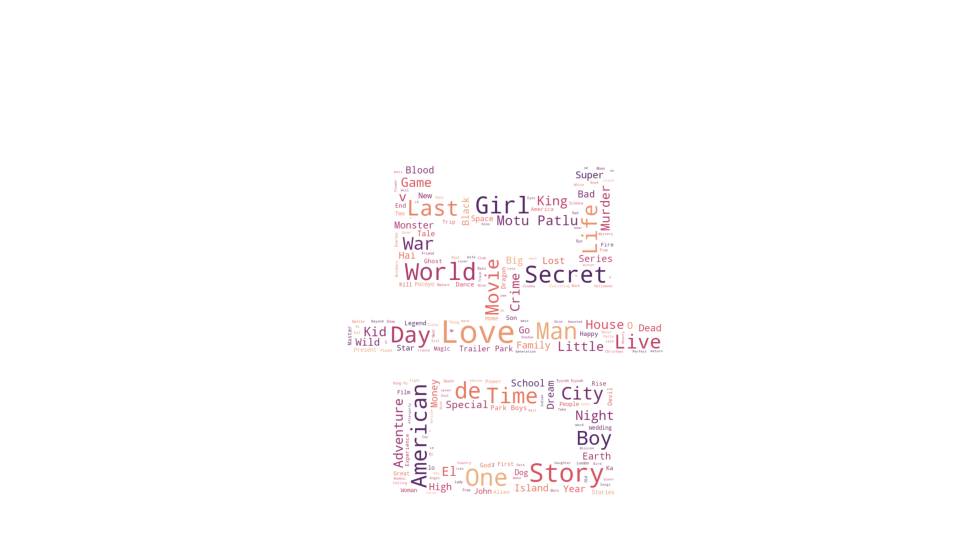

In [162]:
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(background_color='white', width=800, height=800, max_words=200, margin=10, 
                      random_state=1, mask = img, colormap = 'flare').generate(text)
# colormap = 'inferno'
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 여름

In [163]:
df6 = df[df['month_added'] == 6]
df7 = df[df['month_added'] == 7]
df8 = df[df['month_added'] == 8]

In [164]:
df_summer = pd.concat([df6, df7, df8])
df_summer.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
618,Movie,America: The Motion Picture,Matt Thompson,"Channing Tatum, Jason Mantzoukas, Olivia Munn,...",United States,2021-06-30,2021,TV-MA,98,"Action & Adventure, Comedies",6,June,2021,United States,adults,NaN,"[Action & Adventure, Comedies]"
619,Movie,Deranged,Jameel Buari,"Nadia Buari, Ramsey Nouah, Zynnell Zuh, Prisci...",missing,2021-06-30,2020,TV-14,98,"Dramas, International Movies",6,June,2021,missing,youth,NaN,"[Dramas, International Movies]"
620,TV Show,Droppin' Cash: Los Angeles,missing,missing,United States,2021-06-30,2019,TV-MA,NaN,Reality TV,6,June,2021,United States,adults,1,[Reality TV]
621,TV Show,Legend of Exorcism,Shen Leping,"Bian Jiang, Chen Jinwen, Ling Fei",missing,2021-06-30,2020,TV-14,NaN,"Anime Series, Crime TV Shows, International TV...",6,June,2021,missing,youth,1,"[Anime Series, Crime TV Shows, International T..."
622,Movie,Lying and Stealing,Matt Aselton,"Theo James, Emily Ratajkowski, Fred Melamed, E...",United States,2021-06-30,2019,R,100,Thrillers,6,June,2021,United States,adults,NaN,[Thrillers]


In [165]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_summer['title'])
text

'America: The Motion Picture Deranged Droppin\' Cash: Los Angeles Legend\xa0of\xa0Exorcism Lying and Stealing Mommy Issues Prime Time Somos. Sophie: A Murder in West Cork The Daily Life of the Immortal King StarBeam A Way Back Home Killing Them Softly The Seven Deadly Sins Wanted Into the Wind Wonder Boy Here Comes the Rain The Ice Road Ray Sex/Life Godzilla Singular Point Jiva! Sisters on Track The Naked Director The Seventh Day Good on Paper Murder by the Coast The House of Flowers: The Movie The Parisian Agency: Exclusive Properties Too Hot to Handle Broken O Vendedor de Sonhos Osuofia in London Osuofia in London II This Is Pop #Selfie #Selfie 69 Love Is a Story The Mole Nevertheless, Bangkok Love Stories: Innocence Black Lightning Call My Agent! Champions Charité at War Cleo & Cuquin Deadwind Gameboys Level-Up Edition Glee Hap and Leonard Locked Up Mobile Suit Gundam II: Soldiers of Sorrow Mobile Suit Gundam III: Encounters in Space Mobile Suit Gundam: Char\'s Counterattack No Time

In [166]:
import PIL
img = PIL.Image.open('/content/drive/MyDrive/AI프로젝트/공조_넷플릭스데이터분석/summer_img.png')
img = np.array(img)

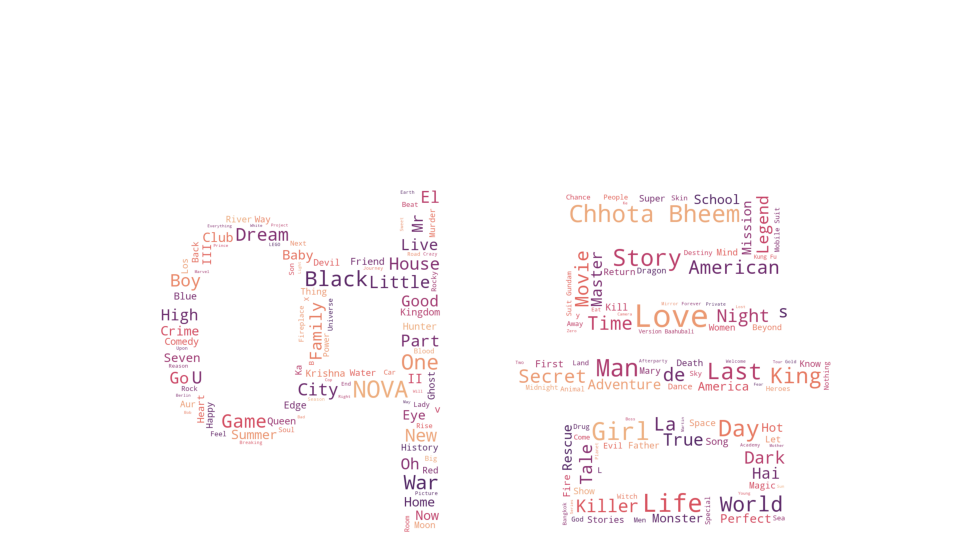

In [167]:
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(background_color='white', width=800, height=800, max_words=200, margin=10, 
                      random_state=1, mask = img, colormap = 'flare').generate(text)
# colormap = 'inferno'
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 가을

In [168]:
df9 = df[df['month_added'] == 9]
df10 = df[df['month_added'] == 10]
df11 = df[df['month_added'] == 11]

In [169]:
df_fall = pd.concat([df9, df10, df11])
df_fall.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90,Documentaries,9,September,2021,United States,teens,NaN,[Documentaries]
1,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries",9,September,2021,South Africa,adults,2,"[International TV Shows, TV Dramas, TV Mysteries]"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",9,September,2021,missing,adults,1,"[Crime TV Shows, International TV Shows, TV Ac..."
3,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,NaN,"Docuseries, Reality TV",9,September,2021,missing,adults,1,"[Docuseries, Reality TV]"
4,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,NaN,"International TV Shows, Romantic TV Shows, TV ...",9,September,2021,India,adults,2,"[International TV Shows, Romantic TV Shows, TV..."


In [170]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_fall['title'])
text

'Dick Johnson Is Dead Blood & Water Ganglands Jailbirds New Orleans Kota Factory Midnight Mass My Little Pony: A New Generation Sankofa The Great British Baking Show The Starling Vendetta: Truth, Lies and The Mafia Bangkok Breaking Je Suis Karl Confessions of an Invisible Girl Crime Stories: India Detectives Dear White People Europe\'s Most Dangerous Man: Otto Skorzeny in Spain Falsa identidad Intrusion Jaguar Monsters Inside: The 24 Faces of Billy Milligan Resurrection: Ertugrul Avvai Shanmughi Go! Go! Cory Carson: Chrissy Takes the Wheel Jeans Love on the Spectrum Minsara Kanavu Grown Ups Dark Skies Paranoia Ankahi Kahaniya Chicago Party Aunt Sex Education Squid Game Tayo and Little Wizards The Father Who Moves Mountains The Stronghold Angry Birds Birth of the Dragon Chhota Bheem He-Man and the Masters of the Universe Jaws Jaws 2 Jaws 3 Jaws: The Revenge My Heroes Were Cowboys Safe House The Smart Money Woman Training Day Castle and Castle Dharmakshetra InuYasha the Movie 2: The Cast

In [171]:
import PIL
img = PIL.Image.open('/content/drive/MyDrive/AI프로젝트/공조_넷플릭스데이터분석/fall_img.png')
img = np.array(img)

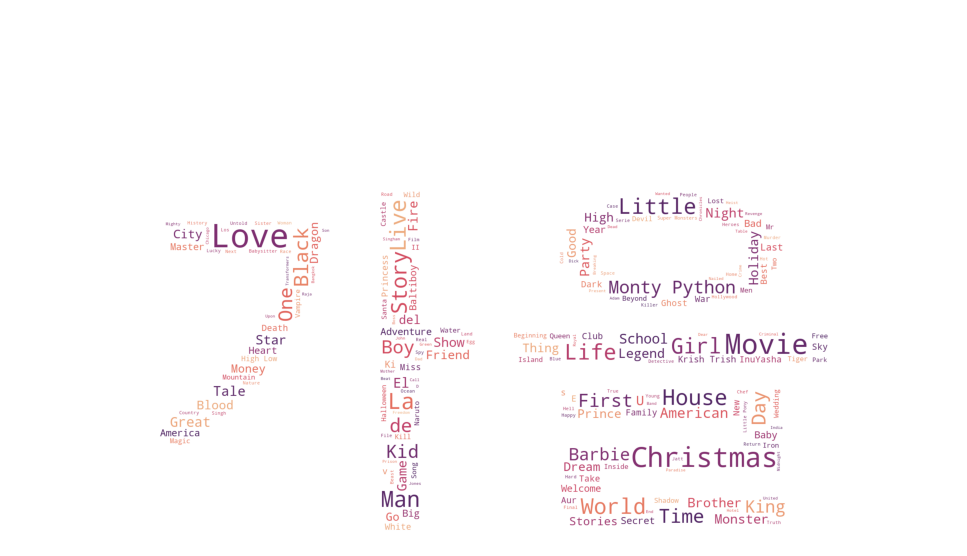

In [172]:
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(background_color='white', width=800, height=800, max_words=200, margin=10, 
                      random_state=1, mask = img, colormap = 'flare').generate(text)
# colormap = 'inferno'
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 겨울

In [173]:
df12 = df[df['month_added'] == 12]
df1 = df[df['month_added'] == 1]
df2 = df[df['month_added'] == 2]

In [174]:
df_winter = pd.concat([df12, df1, df2])
df_winter.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added,country_1st,target_user,season_count,genre
1470,Movie,Alaska Is a Drag,Shaz Bennett,"Martin L. Washington Jr., Maya Washington, Mat...",United States,2020-12-31,2017,TV-MA,83,"Dramas, LGBTQ Movies",12,December,2020,United States,adults,NaN,"[Dramas, LGBTQ Movies]"
1471,Movie,Best of Stand-Up 2020,missing,"Jerry Seinfeld, Leslie Jones, Taylor Tomlinson...",missing,2020-12-31,2020,TV-MA,77,Stand-Up Comedy,12,December,2020,missing,adults,NaN,[Stand-Up Comedy]
1472,Movie,Bobby Jasoos,Samar Shaikh,"Vidya Balan, Ali Fazal, Supriya Pathak, Tanvi ...",India,2020-12-31,2014,TV-14,116,"Comedies, Dramas, International Movies",12,December,2020,India,youth,NaN,"[Comedies, Dramas, International Movies]"
1473,TV Show,Chilling Adventures of Sabrina,missing,"Kiernan Shipka, Ross Lynch, Miranda Otto, Lucy...",United States,2020-12-31,2020,TV-14,NaN,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy",12,December,2020,United States,youth,4,"[TV Horror, TV Mysteries, TV Sci-Fi & Fantasy]"
1474,Movie,Tarung Sarung,Archie Hekagery,"Panji Zoni, Yayan Ruhian, Maizura, Cemal Faruk...",Indonesia,2020-12-31,2020,TV-PG,116,"Action & Adventure, Dramas, Faith & Spirituality",12,December,2020,Indonesia,elem,NaN,"[Action & Adventure, Dramas, Faith & Spiritual..."


In [175]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_winter['title'])
text

'Alaska Is a Drag Best of Stand-Up 2020 Bobby Jasoos Chilling Adventures of Sabrina Tarung Sarung Too Handsome to Handle Best Leftovers Ever! Dare Me Equinox SanPa: Sins of the Savior Still Game The Rope Curse 2 Transformers: War for Cybertron: Earthrise A Love So Beautiful Cops and Robbers Rango Death to 2020 Sakho & Mangane DNA Regiment Diaries The Magic School Bus Rides Again In the Zone AK vs AK Bridgerton Isa Pa with Feelings We Can Be Heroes Bridezilla Cemara\'s Family Hello, Love, Goodbye The History of Future Folk The Midnight Sky Your Name Engraved Herein After We Collided London Hughes: To Catch a D*ck Lovestruck in the City QLIMAX THE SOURCE Rhyme Time Town Singalongs Shaun the Sheep Shaun the Sheep: The Farmer’s Llamas Timmy Time Ariana grande: excuse me, i love you The Con Is On Mohamed Hussein Rhys Nicholson Live at the Athenaeum Atlas Shrugged: Part II Diamond City Guest House Home for Christmas Ma Rainey\'s Black Bottom Ma Rainey\'s Black Bottom: A Legacy Brought to Scr

In [176]:
import PIL
img = PIL.Image.open('/content/drive/MyDrive/AI프로젝트/공조_넷플릭스데이터분석/winter_img.png')
img = np.array(img)

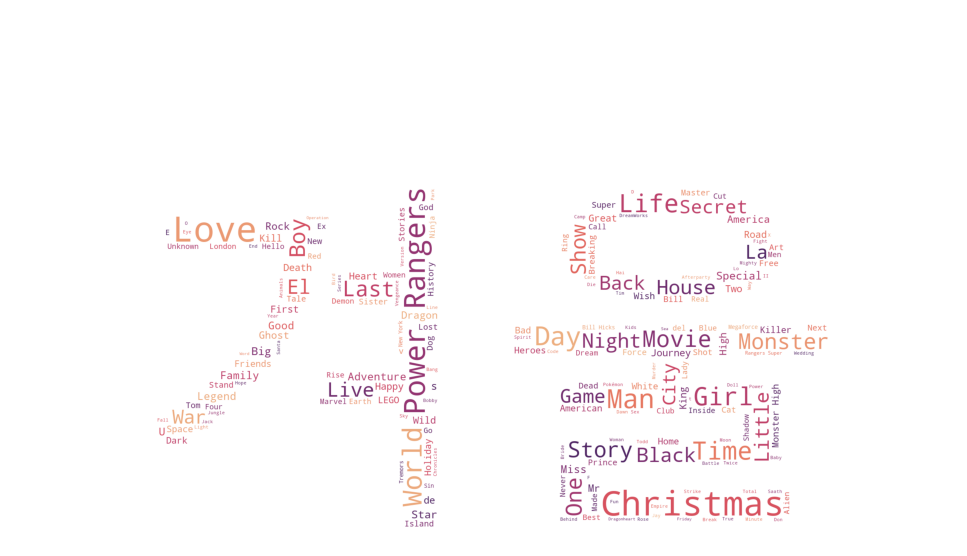

In [177]:
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(background_color='white', width=800, height=800, max_words=200, margin=10, 
                      random_state=1, mask = img, colormap = 'flare').generate(text)
# colormap = 'inferno'
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# IV. 결론

1. 2020년이 다가오면서, 영화 개수는 떨어지고 TV쇼가 증가합니다. 
- 유력한 원인 중 하나는 바로 코로나19의 유행으로 인해 영화산업이 축소된 것입니다. 
- 또 동시에 넷플릭스 오리지널 시리즈는 흥행하면서 TV 쇼는 확대된 것으로 분석해볼 수 있습니다.
<br>
2. 넷플릭스는 미국(자국) 콘텐츠에 더 집중하고 있는 것으로 보인다.
- 의외인 것은 인도 컨텐츠 비중이 꽤 높다. 
- 인도에 사람이 많아서 그리고 발리우드라고 불릴만큼 인도 컨텐츠가 발달해있기 때문이다. 
- 반면 중국은 검열 때문에 아예 금지라 없는 것을 확인할 수 있다.
<br>
3. 또한 소비자 수요를 반영해 2~30대 주요 고객층을 타겟으로 하고 있다.
<br>
4. 2015년부터 다큐멘터리 boom이 존재했지만 최근 넷플릭스는 다큐멘터리 수급에 집중하지 않고 있다.
<br>
5. 계절별로 컨텐츠를 살펴보면 여름에는 crime, killer 가을, 겨울에는 christmas가 등장하기 시작한다.